# Data Cleaning

In [24]:
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
pd.set_option('display.max_columns', None) #show all columns
import numpy as np

csv = ("individual-finance-v2.csv")
df = pd.read_csv(csv)
df.head(3)

,PostCode,Gender,Age,Demographics,Ethnicity,Religion,Immigration,Education,Field.of.Study,Profession,Marital.Status,Family.Size,Dwelling,Personal.Income,credit_card,pay_balance,refuse_cc,mortgage,budget,unexpected_500,unexpected_5000,fin_situation,csb,gic,real_estate,mutual_funds,resp,rrif,rrsp,stocks,term,other
0,M5A3Z2,M,65+,65 years and over-Male,British Isles origins,Christian,Immigrants. An immigrant refers to a person wh...,Bachelor's degree,Social and behavioural sciences and law,44-45 Retail trade,Married,2 persons,Single-detached house: A single dwelling not a...,"$150,000 and over",Percent Household Having Credit Cards: 5+ Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner without Mortgage Among All H...,Percent Household that Has No Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,NaN,NaN,NaN,NaN,NaN,Stocks,NaN,Other bonds
1,M5A3Z2,F,65+,65 years and over-Female,Chinese,No religious affiliation,Immigrants. An immigrant refers to a person wh...,Secondary (high) school diploma or equivalency...,"Mathematics, computer and information sciences",52 Finance and insurance,Widowed,3 persons,Other attached dwelling,"$40,000 to $49,999",Percent Household Having Credit Cards: 3-4 Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner without Mortgage Among All H...,Percent Household that Has Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,Real estate Investment,NaN,NaN,NaN,NaN,Stocks,NaN,Other bonds
2,M5A3Z2,F,65+,65 years and over-Female,Western European origins (except French origins),Christian,Non-immigrants. Refer to persons who are Canad...,"No certificate, diploma or degree",Education,"54 Professional, scientific and technical serv...",Married,2 persons,Other attached dwelling,"$10,000 to $19,999",Percent Household Having Credit Cards: 1-2 Cards,Percent Household Usually Do Not Pay Off Balan...,Percent Household in Which Someone Was Refused...,Percent Homeowner with Mortgage Among All Hou...,Percent Household that Has Budget,Percent Household who Would Finance an Unexpec...,Percent Household who Would Finance an Unexpec...,Percent Household Whose Financial Situation in...,Canada Savings Bonds,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
print(df.shape)
df.isnull().sum(axis = 0) #check total missing values for each column

(3887, 32)


PostCode              0
Gender                0
Age                   0
Demographics          0
Ethnicity             0
Religion              0
Immigration           0
Education           433
Field.of.Study      433
Profession          433
Marital.Status      433
Family.Size         433
Dwelling            433
Personal.Income     433
credit_card         562
pay_balance         562
refuse_cc           562
mortgage            562
budget              562
unexpected_500      562
unexpected_5000     562
fin_situation       562
csb                2319
gic                3398
real_estate        2947
mutual_funds       3746
resp               3717
rrif               3816
rrsp               3669
stocks             3276
term               3766
other              2765
dtype: int64

In [26]:
df["Demographics"].value_counts() #explore age group

65 years and over-Female    323
65 years and over-Male      258
0 to 14 years-Male          218
0 to 14 years-Female        215
30 to 34 years-Female       181
35 to 39 years-Female       181
35 to 39 years-Male         179
50 to 54 years-Male         178
45 to 49 years-Male         175
55 to 59 years-Male         173
40 to 44 years-Male         166
30 to 34 years-Male         160
40 to 44 years-Female       160
60 to 64 years-Male         158
50 to 54 years-Female       152
45 to 49 years-Female       151
55 to 59 years-Female       141
25 to 29 years-Female       141
60 to 64 years-Female       138
25 to 29 years-Male         131
20 to 24 years-Female        90
20 to 24 years-Male          89
15 to 19 years-Male          66
15 to 19 years-Female        63
Name: Demographics, dtype: int64

In [27]:
# These demographic groups explains columns with 562 missing values
group = ["0 to 14 years-Male", "0 to 14 years-Female", "15 to 19 years-Male", "15 to 19 years-Female"]
value = 0
for groups in group:
    grp = len(df.loc[(df["Demographics"] == groups)])
    value += grp
print(value)

# These demographic groups explains columns with 433 missing values
group = ["0 to 14 years-Male", "0 to 14 years-Female"]
value = 0
for groups in group:
    grp = len(df.loc[(df["Demographics"] == groups)])
    value += grp
print(value)

562
433


In [28]:
# remove demographics who are not adults (data not significant)
group = ["0 to 14 years-Male", "0 to 14 years-Female", "15 to 19 years-Male", "15 to 19 years-Female"]
for removeGroups in group:
    df = df[df.Demographics != removeGroups]

# remove the entire "Age" column (since we have demographics column)
# remove the entire "PostCode" column (we are not using postal code column at this time)
column = ['Age', 'PostCode']
for removeColumn in column:
    df = df.loc[:, df.columns != removeColumn]

In [29]:
data = df.copy()        #make a copy
print(data.shape)       #check for size and column

(3325, 30)


# Data Preprocessing

Note that we are using get_dummies since it converts strings directly to one-hot-representation all in one go.

Otherwise, we would need to use label encoder to map data into integers, and then using one-hot-encoder to convert to one-hot-representation but individually.

In [7]:
categorical = ['Gender', 'Demographics', 'Ethnicity', 'Religion', 'Immigration', 'Education',
               'Field.of.Study', 'Profession', 'Marital.Status', 'Family.Size', 'Dwelling', 'Personal.Income',
               'credit_card', 'pay_balance', 'refuse_cc', 'mortgage', 'budget', 'unexpected_500',
               'unexpected_5000', 'fin_situation', 'csb', 'gic', 'real_estate', 'mutual_funds',
               'resp', 'rrif', 'rrsp', 'stocks', 'term', 'other']

#using get_dummies to convert data into one-hot-representations on dataset
for cat in categorical:
    dummies = pd.get_dummies(data[cat], prefix = cat, prefix_sep = "_", dtype=float) #apply get_dummies
    data = pd.concat([data, dummies], axis = 1)   #combine data and dummies (axis=1 for columns)
data.drop(categorical, axis = 1, inplace = True)  #drop original columns, inplace = True drops it permanently
data = data.reset_index(drop=True)                #re-index

In [8]:
data = data.copy()        #make another copy
print(data.shape)         #check for size and column

(3325, 156)


# Data Splitting

In [9]:
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2)  #keep 20% as test set
x_train = x_train.reset_index(drop=True)                 #re-index
x_test = x_test.reset_index(drop=True)  
print(x_train.shape, x_test.shape)

(2660, 156) (665, 156)


# Setting up Encoder

In [10]:
from keras.layers import Input, Dense             # Input is orignal layer, Dense connects other layer
from keras.models import Model
from keras import regularizers                    # Regularizer
from keras import backend as K                    # Import backend engine
from keras.callbacks import EarlyStopping         # stops model if no improvements from test data when using training data
import pickle                                     # for data storing (0 and 1)   
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x_train = x_train.values                          #convert to matrix form
x_train = MinMaxScaler().fit_transform(x_train)   #convert to [0,1] scaling using MinMaxScaler
x_test = x_test.values
x_test = MinMaxScaler().fit_transform(x_test)

input_size = 156
hidden_size = 512
code_size = 3
n_epochs = 156   #number of times we pass the entire dataset through the network
batch_size = 100 #number of batches in the entire dataset

input_data = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_data)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_data = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_data, output_data)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_history = autoencoder.fit(x_train, x_train, epochs=n_epochs, 
                                      batch_size = batch_size, validation_data=(x_test, x_test), #test data for overfitting
                                      callbacks = [EarlyStopping(monitor='loss',patience = 5)])  #callbacks if no improvements

Using TensorFlow backend.


Train on 2660 samples, validate on 665 samples
Epoch 1/156
2660/2660 [==============================] - 1s 223us/step - loss: 0.5010 - val_loss: 0.3283
Epoch 2/156
2660/2660 [==============================] - 0s 142us/step - loss: 0.3041 - val_loss: 0.2933
Epoch 3/156
2660/2660 [==============================] - 0s 144us/step - loss: 0.2878 - val_loss: 0.2845
Epoch 4/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.2812 - val_loss: 0.2787
Epoch 5/156
2660/2660 [==============================] - 0s 142us/step - loss: 0.2677 - val_loss: 0.2570
Epoch 6/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.2499 - val_loss: 0.2474
Epoch 7/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.2420 - val_loss: 0.2432
Epoch 8/156
2660/2660 [==============================] - 0s 147us/step - loss: 0.2371 - val_loss: 0.2387
Epoch 9/156
2660/2660 [==============================] - 0s 145us/step - loss: 0.2327 - val_loss: 0.2363
Epoch 10

Epoch 78/156
2660/2660 [==============================] - 0s 141us/step - loss: 0.1684 - val_loss: 0.1912
Epoch 79/156
2660/2660 [==============================] - 0s 142us/step - loss: 0.1681 - val_loss: 0.1915
Epoch 80/156
2660/2660 [==============================] - 0s 141us/step - loss: 0.1677 - val_loss: 0.1912
Epoch 81/156
2660/2660 [==============================] - 0s 141us/step - loss: 0.1670 - val_loss: 0.1912
Epoch 82/156
2660/2660 [==============================] - 0s 142us/step - loss: 0.1670 - val_loss: 0.1917
Epoch 83/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.1667 - val_loss: 0.1905
Epoch 84/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.1661 - val_loss: 0.1905
Epoch 85/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.1657 - val_loss: 0.1904
Epoch 86/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.1655 - val_loss: 0.1906
Epoch 87/156
2660/2660 [======================

Epoch 155/156
2660/2660 [==============================] - 0s 141us/step - loss: 0.1503 - val_loss: 0.1920
Epoch 156/156
2660/2660 [==============================] - 0s 144us/step - loss: 0.1497 - val_loss: 0.1919


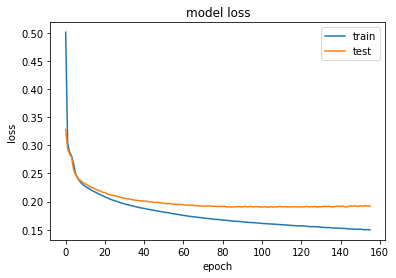

In [11]:
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

# Clustering dimension reduced data in 3D (autoencoder)

In [12]:
#Get code layer
get_3rd_layer_output = K.function([autoencoder.layers[0].input],[autoencoder.layers[2].output]) #first and third layer
layer_output = get_3rd_layer_output([x_train])[0]
layer_output

array([[11.254238 , 46.994553 , 13.683618 ],
       [22.084898 , 14.059239 , 12.076016 ],
       [ 3.8224397,  8.0693035, 38.0813   ],
       ...,
       [33.30512  , 40.069656 , 36.939114 ],
       [15.787674 , 24.815016 , 56.593452 ],
       [22.903963 , 16.900923 , 12.316034 ]], dtype=float32)

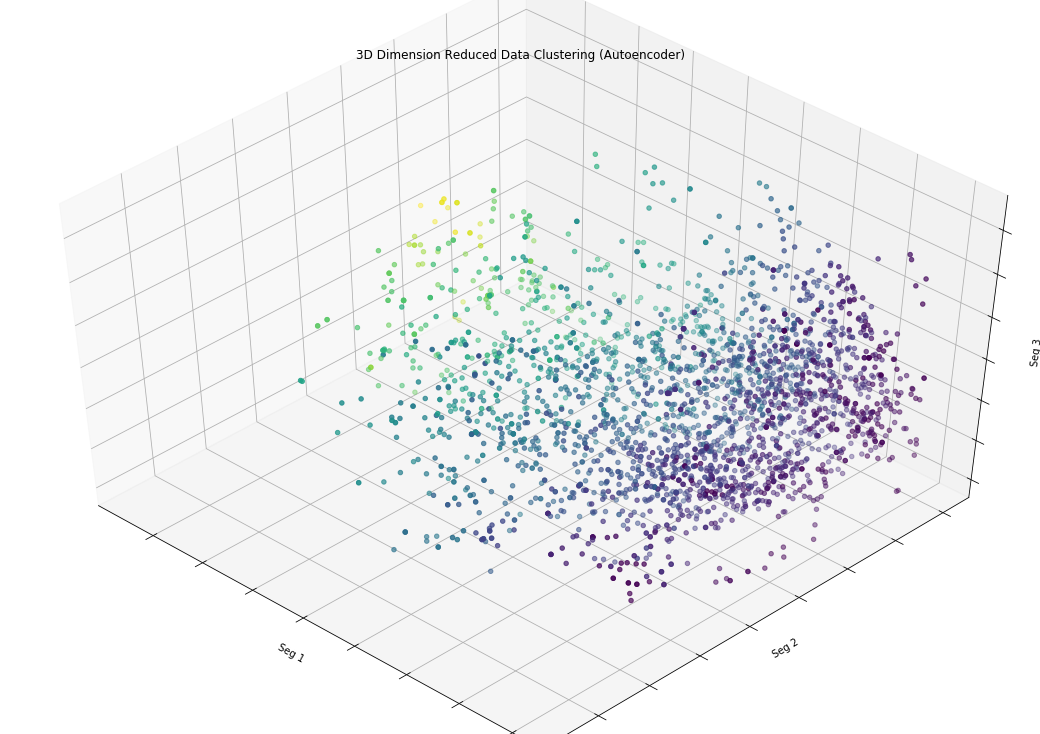

In [13]:
#Visualization on clusters
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(1, figsize=(15, 10))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
ax.scatter(layer_output[:,0], layer_output[:,1], layer_output[:,2],c=layer_output[:,0])
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Seg 1')
ax.set_ylabel('Seg 2')
ax.set_zlabel('Seg 3')
ax.set_title("3D Dimension Reduced Data Clustering (Autoencoder)")
ax.dist = 9

# Clustering dimension reduced data in 2D (autoencoder)

In [14]:
data = data.copy()        #make another copy

#Data splitting
from sklearn.model_selection import train_test_split
x_train, x_test = train_test_split(data, test_size=0.2)  #keep 20% as test set
x_train = x_train.reset_index(drop=True)                 #re-index
x_test = x_test.reset_index(drop=True)  

#Setting up Encoder
from keras.layers import Input, Dense             # Input is orignal layer, Dense connects other layer
from keras.models import Model
from keras import regularizers                    # Regularizer
from keras import backend as K                    # Import backend engine
from keras.callbacks import EarlyStopping         # stops model if no improvements from test data when using training data
import pickle                                     # for data storing (0 and 1)   
from sklearn.preprocessing import StandardScaler,MinMaxScaler

x_train = x_train.values                          #convert to matrix form
x_train = MinMaxScaler().fit_transform(x_train)   #convert to [0,1] scaling using MinMaxScaler
x_test = x_test.values
x_test = MinMaxScaler().fit_transform(x_test)

input_size = 156
hidden_size = 512
code_size = 2
n_epochs = 156   #number of times we pass the entire dataset through the network
batch_size = 100 #number of batches in the entire dataset

input_data = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='relu')(input_data)
code = Dense(code_size, activation='relu')(hidden_1)
hidden_2 = Dense(hidden_size, activation='relu')(code)
output_data = Dense(input_size, activation='sigmoid')(hidden_2)

autoencoder = Model(input_data, output_data)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder_history = autoencoder.fit(x_train, x_train, epochs=n_epochs, 
                                      batch_size = batch_size, validation_data=(x_test, x_test), #test data for overfitting
                                      callbacks = [EarlyStopping(monitor='loss',patience = 5)])  #callbacks if no improvements

Train on 2660 samples, validate on 665 samples
Epoch 1/156
2660/2660 [==============================] - 1s 243us/step - loss: 0.5122 - val_loss: 0.3328
Epoch 2/156
2660/2660 [==============================] - 0s 160us/step - loss: 0.3066 - val_loss: 0.3002
Epoch 3/156
2660/2660 [==============================] - 0s 158us/step - loss: 0.2909 - val_loss: 0.2882
Epoch 4/156
2660/2660 [==============================] - 0s 165us/step - loss: 0.2806 - val_loss: 0.2826
Epoch 5/156
2660/2660 [==============================] - 0s 182us/step - loss: 0.2764 - val_loss: 0.2798
Epoch 6/156
2660/2660 [==============================] - 1s 224us/step - loss: 0.2733 - val_loss: 0.2761
Epoch 7/156
2660/2660 [==============================] - 0s 181us/step - loss: 0.2702 - val_loss: 0.2734
Epoch 8/156
2660/2660 [==============================] - 0s 154us/step - loss: 0.2678 - val_loss: 0.2717
Epoch 9/156
2660/2660 [==============================] - 0s 155us/step - loss: 0.2663 - val_loss: 0.2698
Epoch 10

Epoch 78/156
2660/2660 [==============================] - 0s 144us/step - loss: 0.2141 - val_loss: 0.2256
Epoch 79/156
2660/2660 [==============================] - 0s 169us/step - loss: 0.2136 - val_loss: 0.2254
Epoch 80/156
2660/2660 [==============================] - 1s 192us/step - loss: 0.2132 - val_loss: 0.2258
Epoch 81/156
2660/2660 [==============================] - 0s 171us/step - loss: 0.2130 - val_loss: 0.2252
Epoch 82/156
2660/2660 [==============================] - 0s 146us/step - loss: 0.2125 - val_loss: 0.2255
Epoch 83/156
2660/2660 [==============================] - 0s 147us/step - loss: 0.2124 - val_loss: 0.2256
Epoch 84/156
2660/2660 [==============================] - 1s 192us/step - loss: 0.2125 - val_loss: 0.2251
Epoch 85/156
2660/2660 [==============================] - 0s 167us/step - loss: 0.2123 - val_loss: 0.2253
Epoch 86/156
2660/2660 [==============================] - 0s 173us/step - loss: 0.2118 - val_loss: 0.2250
Epoch 87/156
2660/2660 [======================

Epoch 155/156
2660/2660 [==============================] - 0s 143us/step - loss: 0.1989 - val_loss: 0.2236
Epoch 156/156
2660/2660 [==============================] - 0s 142us/step - loss: 0.1989 - val_loss: 0.2232


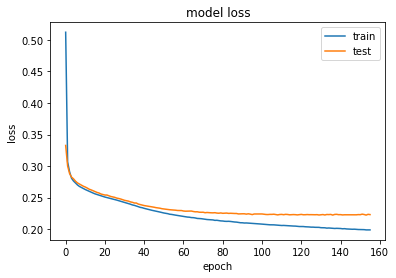

In [15]:
plt.plot(autoencoder_history.history['loss'])
plt.plot(autoencoder_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show();

Text(0.5, 1.0, '2D Dimension Reduced Data Clustering (Autoencoder)')

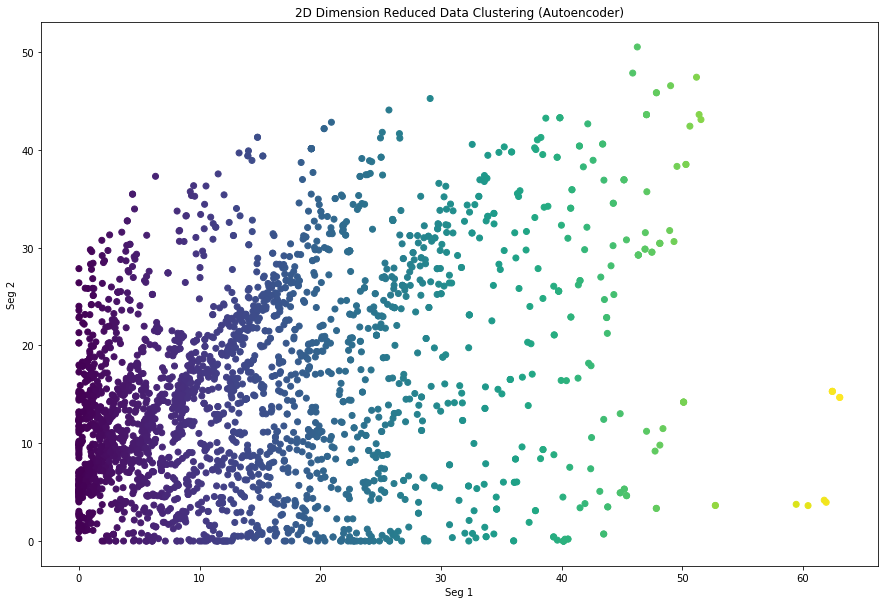

In [20]:
#Get code layer
get_3rd_layer_output = K.function([autoencoder.layers[0].input],[autoencoder.layers[2].output]) #first and third layer
layer_output = get_3rd_layer_output([x_train])[0]

#Visualization on clusters
fig = plt.figure(1, figsize=(15, 10))
plt.scatter(layer_output[:,0], layer_output[:,1], c=layer_output[:,0])
plt.xlabel("Seg 1")
plt.ylabel("Seg 2")
plt.title("2D Dimension Reduced Data Clustering (Autoencoder)")